In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
selected_pollutant='CO'
selected_state='Florida'

In [5]:
years=os.listdir(f'DataAQ/{selected_pollutant}-{selected_state}')
years=[int(y.split('-')[-1]) for y in years]
years.sort()
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [6]:
d=pd.read_csv('DataAQ/CO-Florida/CO-Florida-2020')
d['Site Name'].value_counts()

Near Road - Fort Lauderdale       366
Sawgrass Lake Park (Near-Road)    366
Pepsi Place                       364
SYDNEY                            363
WINTER PARK                       363
Daniela Banu NCORE                357
Munro Street (Near-Road)          353
Lab Annex                         326
St. Marks Wildlife Refuge         307
Name: Site Name, dtype: int64

In [7]:
d=pd.DataFrame()
for i in years:
    d1=pd.read_csv(f'DataAQ/{selected_pollutant}-{selected_state}/{selected_pollutant}-{selected_state}-{i}')
    d1=d1.groupby(['Date']).mean()
    d=d.append(d1)
d.index=pd.to_datetime(d.index)
d.shape


(15615, 12)

In [9]:
d.head()

,Site ID,POC,Daily Max 8-hour CO Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,
1980-01-01,1.203858e+08,1.125000,0.812500,9.250000,18.000000,74.875000,42101.0,34555.000000,12.0,38.500000,28.687694,-82.220872
1980-01-02,1.204530e+08,1.111111,2.622222,29.666667,19.555556,81.444444,42101.0,34393.333333,12.0,45.222222,28.468513,-81.981057
1980-01-03,1.204530e+08,1.111111,3.877778,43.555556,22.555556,94.000000,42101.0,34393.333333,12.0,45.222222,28.468513,-81.981057
1980-01-04,1.205029e+08,1.200000,4.000000,43.800000,20.800000,86.600000,42101.0,34628.000000,12.0,50.200000,28.495690,-81.912643
1980-01-05,1.205244e+08,1.222222,1.477778,16.666667,24.000000,100.000000,42101.0,35446.666667,12.0,52.333333,28.277716,-81.954686


In [10]:
d=d[['DAILY_AQI_VALUE']]
d.head()

,DAILY_AQI_VALUE
Date,
1980-01-01,9.250000
1980-01-02,29.666667
1980-01-03,43.555556
1980-01-04,43.800000
1980-01-05,16.666667


In [11]:
idx = pd.date_range(min(d.index),max(d.index))
d=d.reindex(idx,fill_value=np.nan)
d['AQI']= d['DAILY_AQI_VALUE'].interpolate(option='spline')
d.head(10)

,DAILY_AQI_VALUE,AQI
1980-01-01,9.250000,9.250000
1980-01-02,29.666667,29.666667
1980-01-03,43.555556,43.555556
1980-01-04,43.800000,43.800000
1980-01-05,16.666667,16.666667
1980-01-06,13.222222,13.222222
1980-01-07,46.900000,46.900000
1980-01-08,51.300000,51.300000
1980-01-09,49.200000,49.200000
1980-01-10,31.300000,31.300000


In [28]:
d_w=d['AQI'].resample('W').mean()

In [26]:
d_w.shape

(2231,)

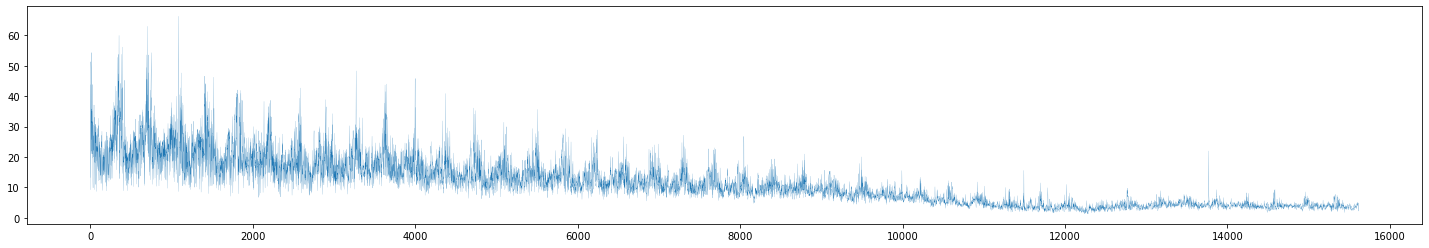

In [31]:
plt.figure(figsize=(25,4))
plt.plot(range(d.shape[0]),d['AQI'],lw=0.15)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(d.AQI.dropna())
print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -3.3839743310756747
p-value: 0.011517469180457722


In [13]:
from statsmodels.graphics.tsaplots import plot_acf

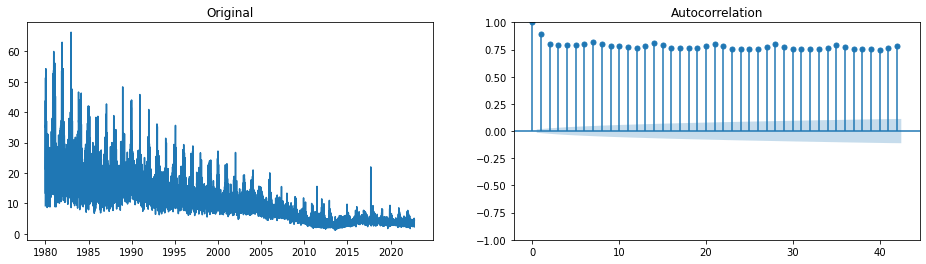

In [15]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(d.AQI)
ax1.set_title('Original')
plot_acf(d.AQI,ax=ax2);

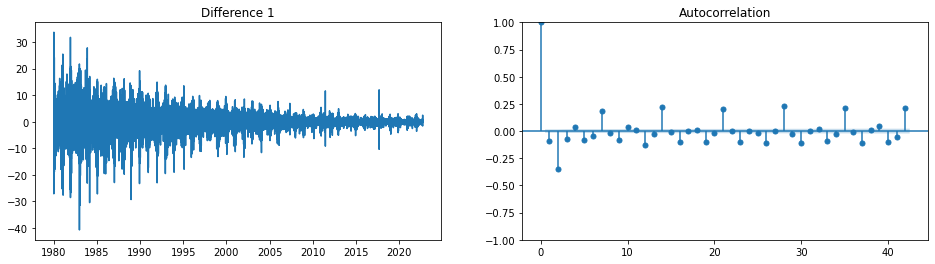

In [17]:
diff=d.AQI.diff().dropna()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference 1')
plot_acf(diff,ax=ax2);

In [1]:
import statsmodels.api as sm

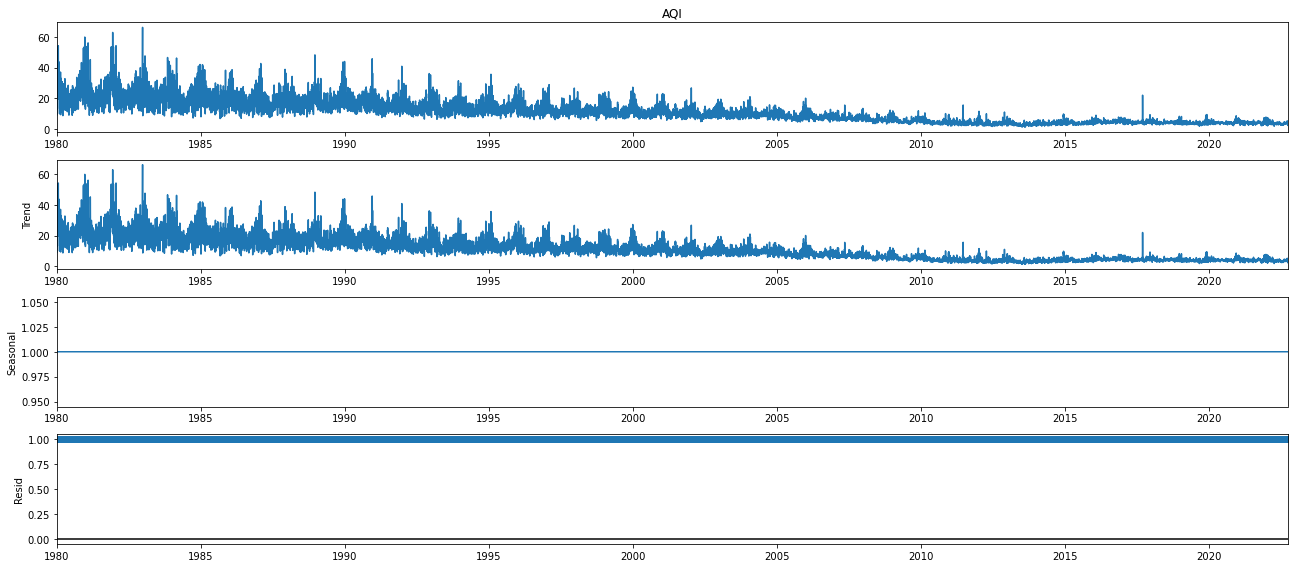

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(d['AQI'], model='multiplicative',period=1)
fig = decomposition.plot()
plt.show()